## Lecture 3 - Random library of Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

> The methods in `numpy.random` allow you to draw samples from a variety of probability distributions.  Example probability distributions that are important to our project: (continuous) uniform distribution on an interval and a normal distribution.  

> You can also draw a sample from a list/array that you provide, which is helpful in different instances, including when working with data.  You can also shuffle a list/array using a random permutation.

In [ ]:
# Sampling uniformly on a range of consecutive integers
# To get 6 integers drawn uniformly from {0,1,2,...,9}  (10 is not included)
print(np.random.randint(0, 10, size=6))
# equivalently, you can call
print(np.random.choice(10, size=6))

[5 5 3 3 6 8]
[0 0 7 2 6 4]


In [ ]:
# If you want sampling without replacement...
np.random.choice(10,size=6,replace=False)

array([7, 9, 2, 3, 8, 0])

> To get a sample from a uniform distribution on the interval $[0,1)$, you can use `np.random.random(size=n)`, with `n` being the number of samples you want.  However, you can also use the method `np.random.uniform()`.  For this method, you need to put in the left and right endpoint of the interval that you want, and then the size of the sample that you want.

In [15]:
print( np.random.random(size=6) )
print( np.random.uniform(0,1, size=6) )  # these two sample from the same distribution (the first, random.random is "legacy", drawing from an old API)

[0.18748482 0.17051242 0.86980288 0.05874517 0.27856982 0.3330317 ]
[0.20844461 0.4973837  0.50493981 0.37674493 0.11308881 0.75048567]


In [16]:
# To sample uniformly from [a, b), here's an example with a=1, b=5
print( np.random.uniform(1, 5, size=6) )
# Or, use uniform on [0,1) and then scale to larger width interval and add the left endpoint to all output
print( (5-1)*np.random.random(size=6) + 1 ) # the '+ 1' at the end adds 1 to every entry in the output sample

[4.18606969 2.92800702 4.74028922 3.91491844 4.57208251 4.62929687]
[3.29739727 3.39297838 1.45471264 3.04120567 3.05948527 1.15440858]


> To get a sample from a normal distribution with mean `mu` and standard deviation `sigma`, use `np.random.normal()`. You put in arguments: `loc=mu` and `scale=sigma` as well as the desired sample size.  The default values for `loc` and `scale` are 0 and 1; if you don't put those arguments in then it will be from the distribution $\mathcal N(0,1)$.

In [18]:
# Sample from normal distribution (`loc` is the mean, default value is 0; `scale` is the standard deviation, default value is 1).
np.random.normal(loc=0, scale=0.1, size=6)

array([-0.10938609, -0.06996681, -0.0391924 ,  0.01132496,  0.14353644,
       -0.05273103])

> You can also make a random matrix, each entry drawn from the given distribution, by putting in an ordered pair for the size argument.

In [34]:
np.random.uniform(0, 1, size=(3,4)) # makes a 3x4 matrix with entries from Uniform(0,1)

array([[0.24717362, 0.72474244, 0.87813177, 0.69150338],
       [0.93259028, 0.45451206, 0.29046566, 0.33823332],
       [0.99119092, 0.48080378, 0.99501349, 0.4678089 ]])

#Visualizing the output

> Plotting in Python is typically done with the package [`matplotlib.pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).  Here is a [tutorial](https://matplotlib.org/stable/tutorials/pyplot.html).  There is also a package called [`seaborn`](https://seaborn.pydata.org/) with some tools that allow you to make the plots look nicer relatively easily.

In [2]:
# import the pyplot package; (usually this would be done at the top of the worksheet)
import matplotlib.pyplot as plt

> The reason I brought up visualization here is that you can plot your random samples (a normalized histogram of them) along with a plot of the probability distribution function and see how they will roughly match.

In [2]:
import seaborn
seaborn.set_style('darkgrid')

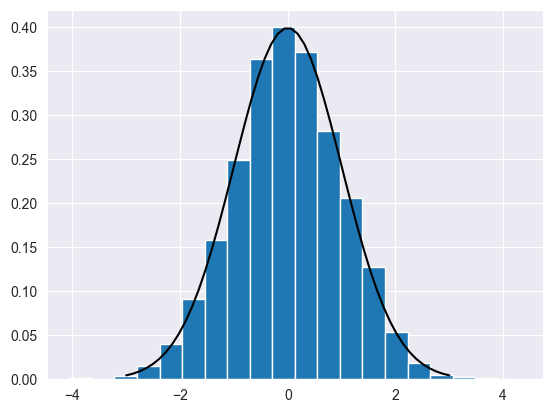

In [5]:
xx = np.linspace(-3,3)
sample = np.random.normal(loc=0,scale=1,size=10000)
plt.plot(xx, np.exp(-(xx-0)**2/(2*1))/np.sqrt(2*np.pi*1), color='black')
plt.hist(sample, bins=20, density=True)
plt.show()

In [26]:
# get a decent size sample from Uniform(-1, 1)
uniform_sample = np.random.uniform(-1, 1, size=2000)
# get a decent size sample from N(0, 1)
normal_sample = np.random.normal(0,1,size=2000)

> The pdf for the uniform distribution above is a constant function, at height 1/2. We'll use `np.linspace()` to make an array of x-values between -1 and 1, then use `plt.plot()` to make a graph at that constant height.
> > In `plt.plot` the first argument is an array of x-values; the second argument is an array of y-values, which must have one y-value for each x-value that is in the first argument.
> > We will put in the sampled data as a histogram. The method for this is `plt.hist()`.

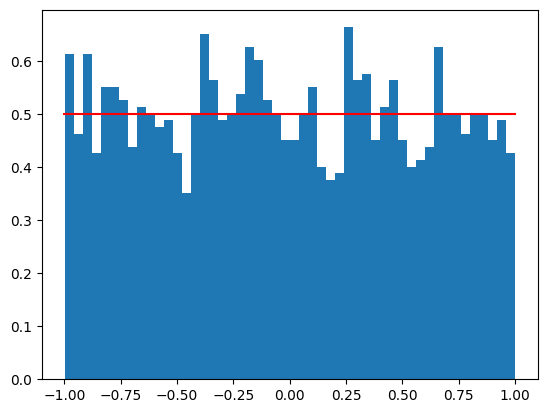

In [32]:
xx = np.linspace(-1,1)

plt.plot(xx, [0.5]*50, c='red') # notice what I did there for the y-values
plt.hist(uniform_sample, bins=50, density=True) # the histogram; with `density` set to true, the height of a bar represents the percentage of
                                                # sampled numbers that fell within the range for that bin.

plt.show()

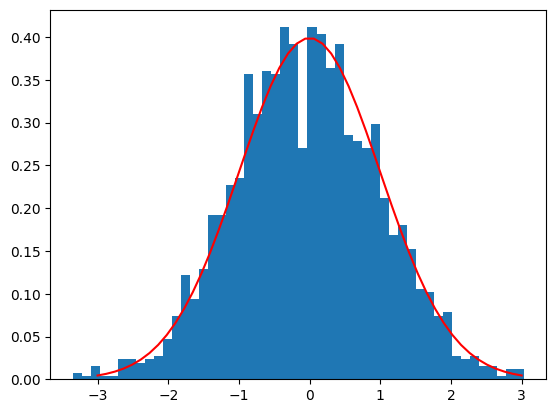

In [33]:
# For the sample from the normal distribution
xx = np.linspace(-3, 3) # extend the plot to 3 standard deviations
plt.plot(xx, np.exp(-xx**2/2)/np.sqrt(2*np.pi), c='red') # for the y-values, the x-values are being put into the pdf for the standard normal
plt.hist(normal_sample, bins=50, density=True) # the histogram; with `density` set to true, the height of a bar represents the percentage of
                                                # sampled numbers that fell within the range for that bin.

plt.show()

# Some information below relates to how you can draw random samples from data.

In [ ]:
# To uniformly sample from an array you have
my_array = np.array(['a','a','a','a','a','a','a','a','b','c','5','5','d','e','f','0.1','a','a','a','5','5','a','f','1'])
np.random.choice(my_array, size=6)

array(['a', 'a', 'a', '5', 'f', '5'], dtype='<U3')

If you want to get a random sample of *indices* (positions), and then pull out the entries at those indices from more than one array, making sure that the ones that had matching positions still have matching positions...

In [ ]:
my_second_array = np.array([0,0,0,0,0,0,0,0,1,2,3,3,4,5,6,7,0,0,0,3,3,0,6,8])
len(my_array) == len(my_second_array) # First, double check that the length of the two arrays are the same

True

In [ ]:
my_second_array[ [12,11,10,9,8,7,6,5,4,3] ] # a nice feature of a numpy array: you can give it a list/array of indices and it will return a subarray of itself corresponding to those indices (in the order you put them)

array([4, 3, 3, 2, 1, 0, 0, 0, 0, 0])

In [ ]:
# Now, sample some number of integers that are between 0 and [the length of the array] (exclusive; it will just go up to len(my_array)-1 )
n = len(my_array)
chosen_indices = np.random.choice(n, size=6)
print(my_array[chosen_indices])
print(my_second_array[chosen_indices])

['c' 'd' 'f' 'd' 'a' 'd']
[2 4 6 4 0 4]


In [7]:
x = 4 - np.random.poisson(lam=1,size=200) + np.random.uniform(-0.1,0.9,size=200)

In [8]:
y = np.array([np.random.uniform(0, 0.3*x[i]) for i in range(200)])

In [9]:
vecs = np.column_stack((x,y))

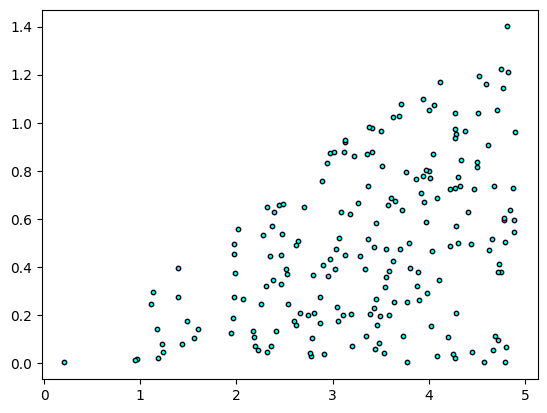

In [10]:
plt.scatter(vecs[:,0], vecs[:,1], c='cyan', edgecolors='black', s=10)
plt.show()

In [11]:
M1 = np.random.normal(loc=0, scale=1, size=(2,2))
M2 = np.random.normal(loc=0, scale=1, size=(2,2))
M3 = np.random.normal(loc=0, scale=1, size=(2,2))
M4 = np.random.normal(loc=0, scale=1, size=(2,2))
M5 = np.random.normal(loc=0, scale=1, size=(2,2))

In [12]:
t1_vecs = vecs@M1
t2_vecs = vecs@M2
t3_vecs = vecs@M3
t4_vecs = vecs@M4
t5_vecs = vecs@M5

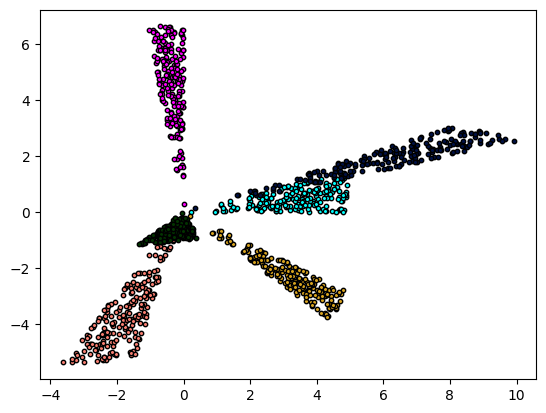

In [13]:
plt.scatter(vecs[:,0], vecs[:,1], c='cyan', edgecolors='black', s=10)
plt.scatter(t1_vecs[:,0], t1_vecs[:,1], c='salmon', edgecolors='black', s=10)
plt.scatter(t2_vecs[:,0], t2_vecs[:,1], c='magenta', edgecolors='black', s=10)
plt.scatter(t3_vecs[:,0], t3_vecs[:,1], c='goldenrod', edgecolors='black', s=10)
plt.scatter(t4_vecs[:,0], t4_vecs[:,1], c='xkcd:dark green', edgecolors='black', s=10)
plt.scatter(t5_vecs[:,0], t5_vecs[:,1], c='xkcd:navy blue', edgecolors='black', s=10)
plt.show()

In [16]:
eg_approx = np.array([1,0])
for i in range(100):
    temp = M1@eg_approx
    eg_approx = temp/np.linalg.norm(temp)
print(eg_approx)

[0.65479357 0.75580777]


In [18]:
M1@eg_approx/eg_approx

array([-1.52956597, -1.52956597])

In [19]:
M1@eg_approx - (-1.52956597*eg_approx)

array([2.59383182e-10, 2.99397618e-10])

In [20]:
M1inv = np.linalg.inv(M1)

In [21]:
eg2_approx = np.array([1,0])
for i in range(100):
    temp = M1inv@eg2_approx
    eg2_approx = temp/np.linalg.norm(temp)
print(eg2_approx)

[ 0.62124781 -0.78361417]


In [22]:
M1@eg2_approx/eg2_approx

array([1.03213128, 1.03213128])

In [23]:
D = np.array([[-1.52956597, 0], [0, 1.03213128]])
P = np.column_stack((eg_approx, eg2_approx))

In [27]:
np.linalg.inv(P)@(M1@P)

array([[-1.52956597e+00,  8.77211229e-17],
       [ 1.82415577e-16,  1.03213128e+00]])

In [43]:
def weird_product(v, *, translate=2):
  reverse_v = v[::-1]
  multiplied = reverse_v * v
  zeros = np.zeros(len(v))
  return np.maximum(multiplied+translate, zeros)

In [9]:
a = np.array([4,3,-2,1,0,-1,-2,3,-4])

In [45]:
weird_product(a, translate=3)

array([ 0., 12.,  7.,  2.,  3.,  2.,  7., 12.,  0.])

In [23]:
def coloring(array_of_points):
    ref_vector = np.array([2,-2/3])
    dotvalues = array_of_points@ref_vector
    colors = np.array(['darkblue' if v < 0 else 'salmon' for v in dotvalues])
    return colors

In [29]:
p = np.random.uniform(-1,1,size=(500,2))

In [30]:
mycolors = coloring(p)

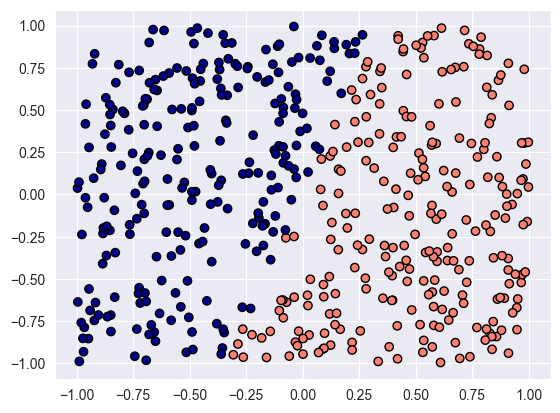

In [31]:
plt.scatter(p[:,0], p[:,1], c=mycolors, edgecolors='black')
plt.show()